# Code Along - Visualization using Matplotlib - Election Analysis

In [216]:
# Path for the Dataset

path = "c:/users/kruti karia/desktop/electors.csv"

path_1 = "c:/users/kruti karia/desktop/candidate.csv"

In [217]:
# Import Packages / Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [218]:
# Read the data

electors = pd.read_csv(path)

candidate = pd.read_csv(path_1)

In [219]:
# Data Attributes for Electors

electors.info()
electors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE CODE                  543 non-null    object 
 1   STATE                       543 non-null    object 
 2   PC NO                       543 non-null    int64  
 3   PARLIAMENTARY CONSTITUENCY  543 non-null    object 
 4   Total voters                543 non-null    int64  
 5   Total_Electors              543 non-null    int64  
 6   TOT_CONTESTANT              543 non-null    int64  
 7   POLL PERCENTAGE             543 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 34.1+ KB


,PC NO,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
count,543.000000,5.430000e+02,5.430000e+02,543.000000,543.000000
mean,18.968692,7.686034e+05,1.320415e+06,14.861878,59.431676
std,16.560438,1.797244e+05,2.492992e+05,6.717637,13.924982
min,1.000000,3.949800e+04,4.598300e+04,3.000000,25.550000
25%,6.000000,6.563710e+05,1.214052e+06,10.000000,47.620000
50%,15.000000,7.634100e+05,1.340892e+06,14.000000,56.550000
75%,27.000000,8.725135e+05,1.449524e+06,18.000000,70.815000
max,80.000000,1.206223e+06,2.343050e+06,43.000000,90.350000


In [220]:
# Data Attributes for Candidate

candidate.info()
candidate.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             8070 non-null   object 
 1   State_name          8070 non-null   object 
 2   Month               8070 non-null   int64  
 3   Year                8070 non-null   int64  
 4   PC_Number           8070 non-null   int64  
 5   PC_name             8070 non-null   object 
 6   PC_Type             8070 non-null   object 
 7   Candidate_Name      8070 non-null   object 
 8   Candidate_Sex       8070 non-null   object 
 9   Candidate_Category  8070 non-null   object 
 10  Candidate_Age       8070 non-null   float64
 11  Party_Abbreviation  8070 non-null   object 
 12  Total_Votes_Polled  8070 non-null   float64
 13  Position            8070 non-null   float64
 14  Alliance            8070 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 945.8+

,Month,Year,PC_Number,Candidate_Age,Total_Votes_Polled,Position
count,8070.0,8070.0,8070.000000,8070.000000,8070.000000,8070.000000
mean,3.0,2009.0,19.570384,45.837673,51708.935343,9.447739
std,0.0,0.0,17.042828,11.831528,109718.351784,6.753222
min,3.0,2009.0,1.000000,25.000000,118.000000,1.000000
25%,3.0,2009.0,7.000000,37.000000,1625.000000,4.000000
50%,3.0,2009.0,14.000000,45.000000,4101.500000,8.000000
75%,3.0,2009.0,28.000000,54.000000,18557.000000,13.000000
max,3.0,2009.0,80.000000,99.000000,832224.000000,43.000000


M    7518
F     552
Name: Candidate_Sex, dtype: int64


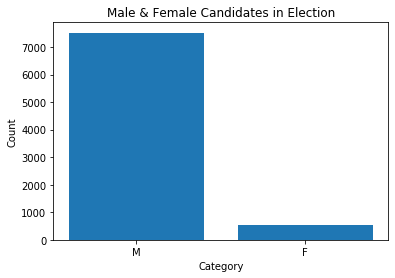

In [221]:
# Plot a bar chart to compare the number of male and female candidates in the election

male_female_count = candidate['Candidate_Sex'].value_counts()
print(male_female_count)

plt.bar(male_female_count.index,male_female_count)
plt.title("Male & Female Candidates in Election")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

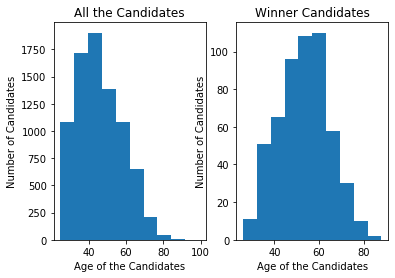

In [222]:
# Plot a histogram of the age of all the candidates as well as of the winner amongst them. Compare them and note an observation

winner = candidate[candidate['Position']==1]

fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].hist(list(candidate['Candidate_Age']),bins=10)
ax[0].set_xlabel('Age of the Candidates')
ax[0].set_ylabel('Number of Candidates')
ax[0].set_title('All the Candidates')


ax[1].hist(list(winner['Candidate_Age']),bins=10)
ax[1].set_xlabel('Age of the Candidates')
ax[1].set_ylabel('Number of Candidates')
ax[1].set_title('Winner Candidates')


plt.show()

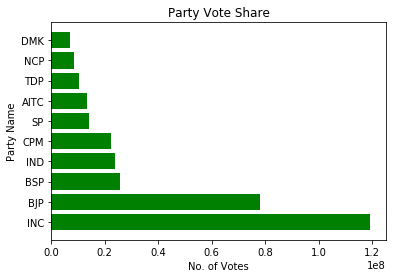

In [223]:
# Plot a bar graph to get the vote shares of different parties

vote_share = candidate.groupby('Party_Abbreviation')['Total_Votes_Polled'].sum().sort_values(ascending = False)

plt.barh(vote_share.index[:10],vote_share[:10],color = 'green')
plt.title("Party Vote Share")
plt.xlabel("No. of Votes")
plt.ylabel("Party Name")
plt.show()

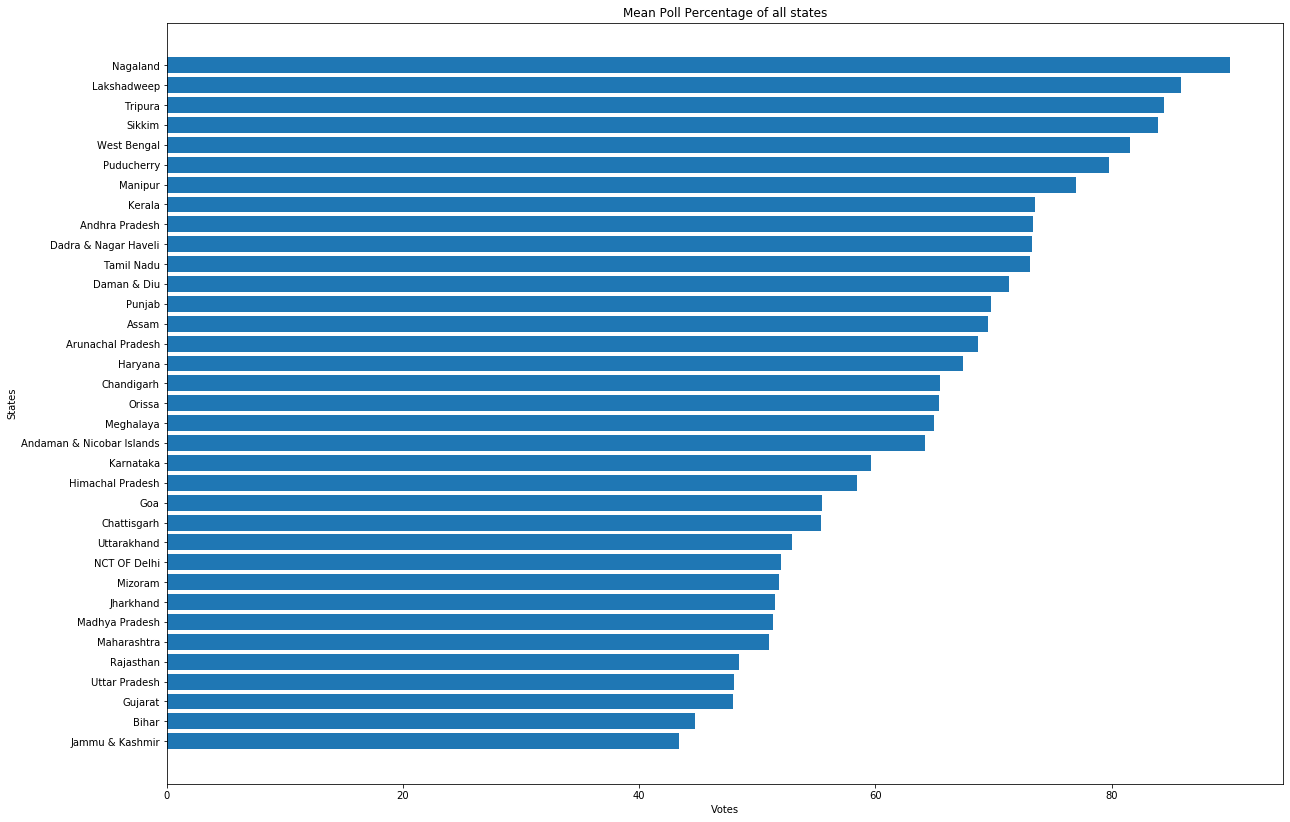

In [224]:
# Plot a barplot to compare the mean poll percentage of all the states

states = electors.groupby('STATE')['POLL PERCENTAGE'].mean().sort_values(ascending = True)
plt.figure(figsize=(20,14))
plt.barh(states.index,states)
plt.title("Mean Poll Percentage of all states")
plt.xlabel("Votes")
plt.ylabel("States")
plt.show()

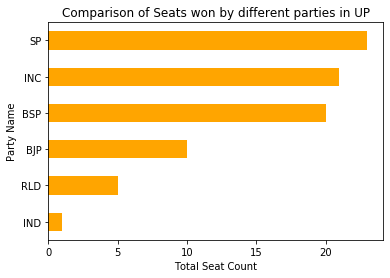

In [225]:
# Plot a bar plot to compare the seats won by different parties in Uttar Pradesh

up_win = candidate[(candidate['Position'] == 1.0) & (candidate['State_name'] == 'Uttar Pradesh') ]
up_win = up_win['Party_Abbreviation'].value_counts().sort_values()


up_win.plot(kind='barh',color = 'orange')
plt.title("Comparison of Seats won by different parties in UP")
plt.xlabel("Total Seat Count")
plt.ylabel("Party Name")
plt.show()

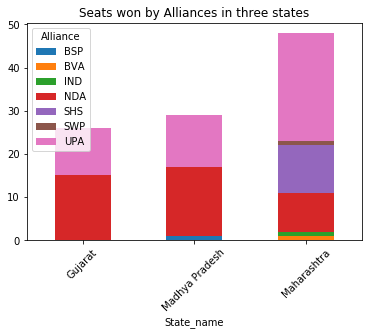

In [226]:
# Plot a stacked bar chart to compare the number of seats won by different `Alliances` in Gujarat,Madhya Pradesh and Maharashtra. 

winner = candidate[candidate['Position']==1]


states = winner[(winner.State_name == 'Gujarat') | (winner.State_name == 'Maharashtra') | (winner.State_name == 'Madhya Pradesh')]

states.groupby(['State_name','Alliance']).size().unstack().plot(kind='bar',stacked=True,title = "Seats won by Alliances in three states")
plt.xticks(rotation = 45)
plt.show()

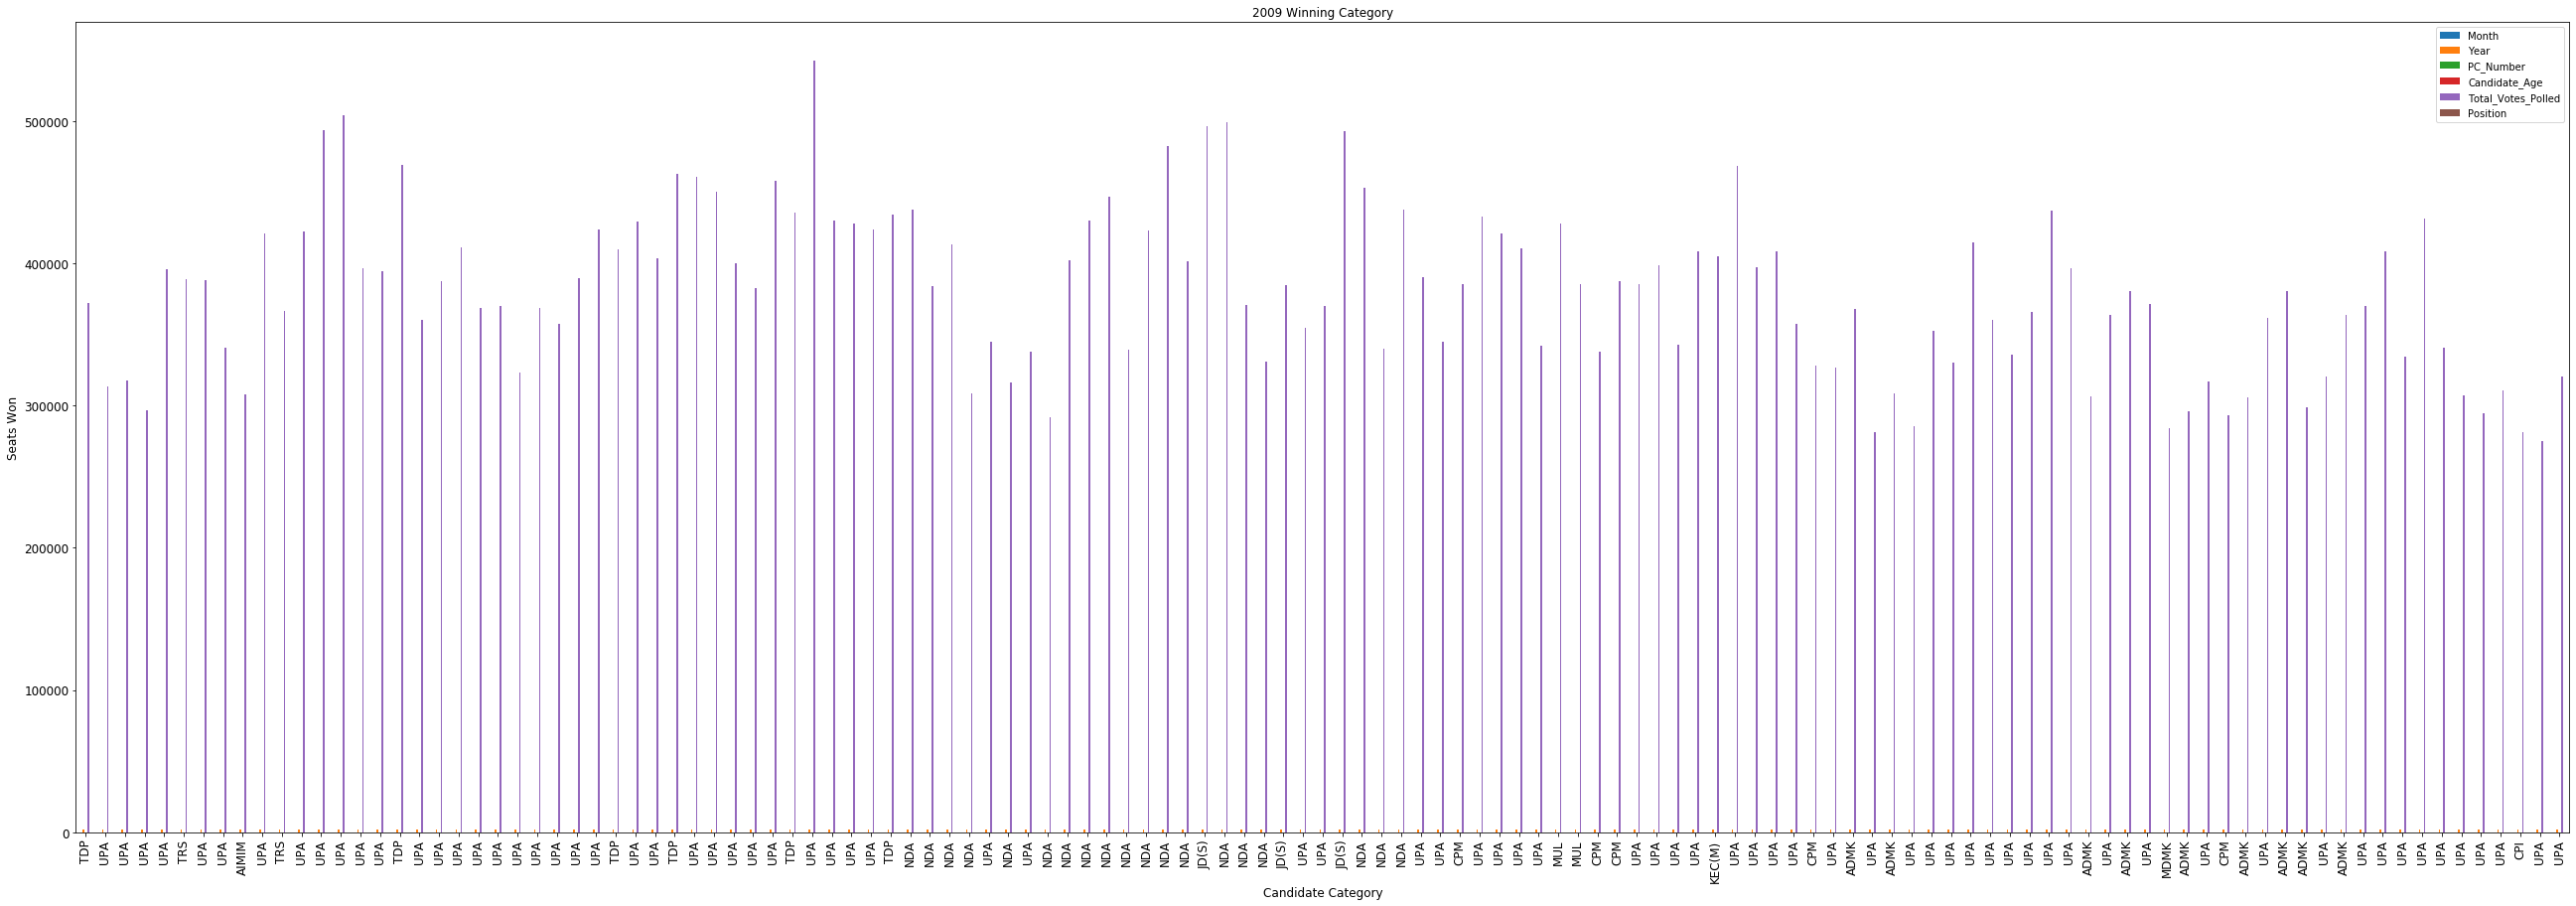

In [227]:
# Plot a grouped bar chart to compare the number of winner candidates on the basis of their caste in the states of Andhra Pradesh, Kerala, Tamil Nadu and Karnataka

cat = candidate[(candidate.State_name=='Andhra Pradesh') | (candidate.State_name=='Kerala') | (candidate.State_name=='Tamil Nadu') | (candidate.State_name=='Karnataka')]
cat = cat[cat['Position']==1]
cat.groupby(['Alliance','Candidate_Category'])['Position'].sum().unstack().reset_index()

nx = cat.plot(kind='bar', title ="2009 Winning Category", figsize=(45,15), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = cat['Alliance']

nx.set_xticklabels(labels)

plt.show()

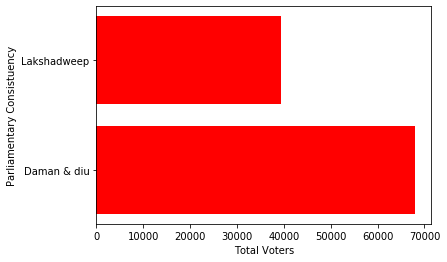

In [228]:
# Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000

voters = electors[electors['Total voters']<100000]

plt.barh(voters['PARLIAMENTARY CONSTITUENCY'],voters['Total voters'],color = 'red')
plt.xlabel("Total Voters")
plt.ylabel("Parliamentary Consistuency")
plt.show()

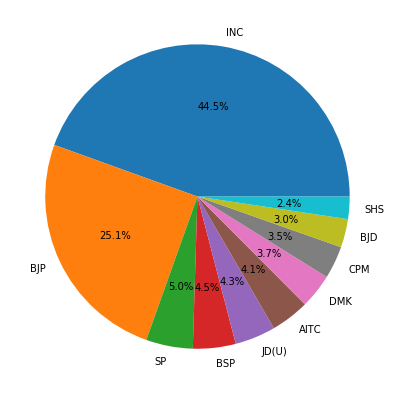

In [229]:
# Plot a pie chart with the top 10 parties with majority seats in the elections

win = candidate[candidate["Position"]==1]
win = win.groupby(['Party_Abbreviation'])['Position'].count().sort_values(ascending = False)

plt.figure(figsize = (7,7))
plt.pie(win[:10],labels=win.index[:10],autopct='%1.1f%%')
plt.show()

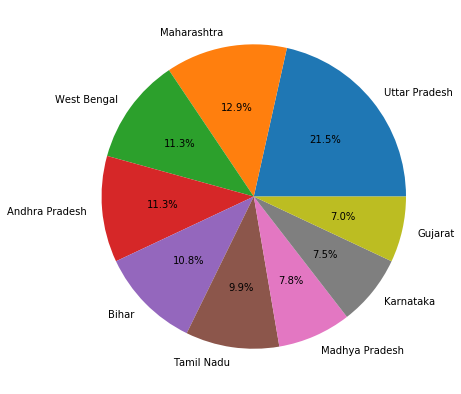

In [230]:
# Plot a pie diagram for top 9 states with most number of seats

win = candidate[candidate["Position"]==1]
win = win.groupby('State_name')['Position'].count().sort_values(ascending = False)

plt.figure(figsize=(7,7))
plt.pie(win[:9],labels = win.index[:9],autopct='%1.1f%%')
plt.show()